In [1]:
%matplotlib inline
import torch
from torch import nn
from d2l import torch as d2l

In [2]:
n_train, n_test, num_inputs, batch_size = 20, 100, 200, 5
true_w, true_b = torch.ones((num_inputs, 1))*0.01, 0.05
train_data = d2l.synthetic_data(true_w, true_b, n_train)
train_iter = d2l.load_array(train_data, batch_size)
test_data = d2l.synthetic_data(true_w, true_b, n_test)
test_iter = d2l.load_array(test_data, batch_size, is_train = False)

In [13]:
def init_params():
    w = torch.normal(0,1, size=(num_inputs, 1), requires_grad = True)
    b = torch.zeros(1, requires_grad=True)
    return [w, b]

def l2_penalty(w):
    return torch.sum(w.pow(2))/2

def train_concise(wd):
    net = nn.Sequential(nn.Linear(num_inputs,1))
    for param in net.parameters():
        param.data.normal_()
    loss = nn.MSELoss()
    num_epochs, lr = 100, 0.003
    #偏置参数没有衰减
    trainer = torch.optim.SGD(
    [{"params":net[0].weight, 'weight_decay':wd},{"params":net[0].bias}],
    lr=lr)
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
                           xlim=[5, num_epochs], legend = ['train', 'test'])
    for epoch in range(num_epochs):
        for X, y in train_iter:
            with torch.enable_grad():
                trainer.zero_grad()
                l=loss(net(X), y)
            l.backward()
            trainer.step()
        if(epoch+1)%5==0:
            animator.add(epoch+1, (d2l.evaluate_loss(net, train_iter, loss),
                                  d2l.evaluate_loss(net, test_iter, loss)))
        print('w的L2范数为：',net[0].weight.norm().item())
        

w的L2范数为： 0.367085337638855


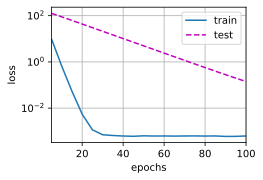

In [14]:
train_concise(3)

w的L2范数为： 3.6367413997650146


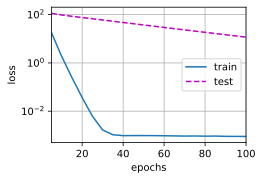

In [15]:
train_concise(1)